# Repartition vs Coalesce (partition down)

| Category | Repartition | Coalesce |
| -- | -- | -- |
| Shuffle | Full shuffle | No shuffle |
| Partition status | Balanced | Possibly imbalance |
| Cost (time-based) | Expensive due to Full shuffle | Cheap |

### Common use-case:

Repartition &rarr; Wide transformation &rarr; Coalesce &rarr; Narrow transformation

In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

In [77]:
spark_session = SparkSession.builder.master("local[*]").appName('Repartition vs Coalesce').getOrCreate()
spark_context = spark_session.sparkContext

In [78]:
data_rdd = spark_context.parallelize(range(10000000))
print(data_rdd.getNumPartitions())

data_rdd = data_rdd.repartition(6)
data_rdd = data_rdd.filter(lambda x: x > 5000000)
data_rdd.count()

12


4999999

In [79]:
data_rdd = spark_context.parallelize(range(10000000))
print(data_rdd.getNumPartitions())

data_rdd = data_rdd.coalesce(6)
data_rdd = data_rdd.filter(lambda x: x > 5000000)
data_rdd.count()

12


4999999

In [80]:
spark_session.stop()

# Web UI Dag Visualization

- With Reparition shuffling the data, Spark add another stage, indicating such operation
- While with Coalesce, the operation is within the stage only

## Repartition

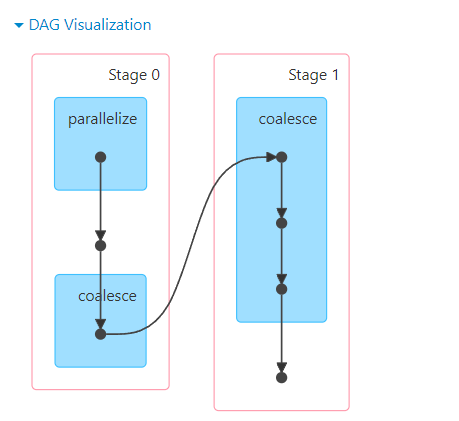

## Coalesce

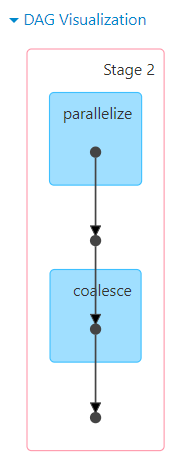